## Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

## Loading and Organising Data

In [3]:
d= pd.read_csv('Mexico.csv')

d= pd.melt(d, ('Country Name', 'Series Name'), var_name= 'year')
d= d.pivot(index= ('Country Name', 'year'), columns= 'Series Name')
d.columns= ['Exports', 'GDP', 'Government', 'Imports', 'Population']
d= d.reset_index()
print(d.head())

  Country Name  year       Exports           GDP    Government       Imports  \
0       Mexico  2000  2.130000e+11  8.760000e+11  1.150000e+11  2.510000e+11   
1       Mexico  2001  2.110000e+11  8.730000e+11  1.120000e+11  2.490000e+11   
2       Mexico  2002  2.120000e+11  8.730000e+11  1.130000e+11  2.520000e+11   
3       Mexico  2003  2.160000e+11  8.850000e+11  1.120000e+11  2.590000e+11   
4       Mexico  2004  2.380000e+11  9.200000e+11  1.110000e+11  2.750000e+11   

    Population  
0   97873442.0  
1   99394288.0  
2  100917081.0  
3  102429341.0  
4  103945813.0  


### Question 1

In [4]:
X= ['Imports', 'Exports', 'Government']
y= 'GDP'

model1= sm.OLS(d[y], sm.add_constant(d[X])).fit()
model1.summary()

c:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1124.
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           9.70e-20
Time:                        20:14:29   Log-Likelihood:                -511.11
No. Observations:                  21   AIC:                             1030.
Df Residuals:                      17   BIC:                             1034.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.509e+11    5.6e+10      6.269      0.000    2.33e+11    4.69e+11
Imports        1.7035      0.205      8.294      0.000       1.270       2.137
Exports       -0.3879      0.238     -1.629      0.122      -0.890       0.114
Government     1.6506      0.664      2.484      0.024       0.249       3.053
==============================================================================
Omnibus:                        6.761   Durbin-Watson:                   1.296
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                1.771
Skew:                           0.007   Prob(JB):                        0.413
Kurtosis:                       1.578   Cond. No.                     1.31e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We see that the coefficients of imports and government are statistically meaningfull and positive. government coef. is 3 times higher than imports meaning that the increase of goverment expenditures may have a tripple effect on the GDP.

### Question 2

In [5]:
X= ['Imports', 'Exports', 'Government']
y= 'GDP'

model2= sm.OLS(np.log(d[y]), sm.add_constant(np.log(d[X]))).fit()
model2.summary()

c:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1505.
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           8.25e-21
Time:                        20:14:42   Log-Likelihood:                 73.167
No. Observations:                  21   AIC:                            -138.3
Df Residuals:                      17   BIC:                            -134.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0887      1.129      9.818      0.000       8.706      13.471
Imports        0.5459      0.066      8.247      0.000       0.406       0.685
Exports       -0.0717      0.067     -1.071      0.299      -0.213       0.069
Government     0.1553      0.067      2.313      0.034       0.014       0.297
==============================================================================
Omnibus:                        0.121   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.941   Jarque-Bera (JB):                0.301
Skew:                           0.137   Prob(JB):                        0.860
Kurtosis:                       2.481   Cond. No.                     2.86e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Log regresion result have same results in case of significance. We see that the coef of imports is higher in this case meaning that a percent of increae in imports would result in 0.5% increase in GDP. This number for the increase of government expenditure is about 0.16%. In both models R2 has a very high value.

Question 3

In [6]:
d['GDPperCapita']= d['GDP']/ d['Population']
d['GovernmentperCapita']= d['Government']/ d['Population']
d['ExportsperCapita']= d['Exports']/ d['Population']
d['ImportsperCapita']= d['Imports']/ d['Population']

X= ['ImportsperCapita', 'ExportsperCapita', 'GovernmentperCapita']
y= 'GDPperCapita'

model3= sm.OLS(d[y], sm.add_constant(d[X])).fit()
model3.summary()

c:\Users\LENOVO\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           GDPperCapita   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     133.8
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           5.05e-12
Time:                        20:16:29   Log-Likelihood:                -124.89
No. Observations:                  21   AIC:                             257.8
Df Residuals:                      17   BIC:                             262.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4676.6132    880.537      5.311      0.000    2818.843    6534.383
ImportsperCapita        1.7594      0.245      7.179      0.000       1.242       2.276
ExportsperCapita       -0.8110      0.232     -3.492      0.003      -1.301      -0.321
GovernmentperCapita     1.1932      0.858      1.391      0.182      -0.617       3.003
==============================================================================
Omnibus:                        2.705   Durbin-Watson:                   0.979
Prob(Omnibus):                  0.259   Jarque-Bera (JB):                1.237
Skew:                          -0.137   Prob(JB):                        0.539
Kurtosis:                       1.843   Cond. No.                     1.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In the per capita case, the coef for imports is positive and exports in negative. government expending is also positive but it is not statistically significant. one unit increase of imports per capita would increase gdp per capita by 1.76. 1 unit increase in exports per capita would decrease gdp per capita by -0.81.

## Question 5

In [20]:
print('model1, normal\n', model1.params)
print('model2, logged\n', model2.params)
print('model3, per capita', model3.params)

model1, normal
 const         3.509461e+11
Imports       1.703513e+00
Exports      -3.878948e-01
Government    1.650637e+00
dtype: float64
model2, logged
 const         11.088668
Imports        0.545851
Exports       -0.071686
Government     0.155306
dtype: float64
model3, per capita const                  4676.613229
ImportsperCapita          1.759393
ExportsperCapita         -0.810970
GovernmentperCapita       1.193163
dtype: float64


We see that in all models, imports and government expending have positive effect, and exports have negative effect. The effect of imports is siginificant in all the models but the effect of the other two varies between the models and they are not siginificant in all of the models.

## Question 6

In [11]:
# We use model 1 for testing
hypotheses = 'Exports = Government'
t_test = model1.t_test(hypotheses)
print(t_test)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -2.0385      0.836     -2.438      0.026      -3.803      -0.274


There is a 2 units difference between the coef. of these variebles. We see that the null hypothesis of the coefs. to be eual is rejected.
So from the interval and p-value we get that the coef for governement is higher than exports in this data.

## Question 7

In [24]:
# We use model 1 for testing
hypotheses = 'Exports = -Imports'
t_test = model1.t_test(hypotheses)
print(t_test)

print(model1.params)

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.3156      0.111     11.820      0.000       1.081       1.550
const         3.509461e+11
Imports       1.703513e+00
Exports      -3.878948e-01
Government    1.650637e+00
dtype: float64


We see that based in the data, the null hypothesis that the two coefs are equal is rejected. Based on the Keynesian formula for the GDP, the coefficients should be equal. This difference is maybe because that the imports in Mexico were mostly capital goods that helped producing goods. So they have their own effect on the GDP and also another effect related to the increase of consumption based on the assumption pf capital goods.

## Question 8

In [30]:
model1.f_test(np.identity(len(model1.params))[1:, :])

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[1124.31954924]]), p=9.700452363836562e-20, df_denom=17, df_num=3>

Above is the result of F test for all of the variebles and since the p-value is so small, we conclude that the model is statistically significant and all the variebles are not 0.

## Question9; Residuals

Text(0.5, 1.0, 'Residuals of 1st Model')

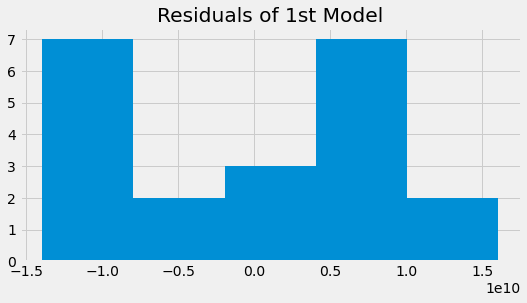

In [44]:
plt.style.use('fivethirtyeight')
plt.figure(figsize= (8, 4))
plt.hist(model1.resid, bins= 5)
plt.title('Residuals of 1st Model')


Text(0.5, 1.0, 'Residuals of 1st Model')

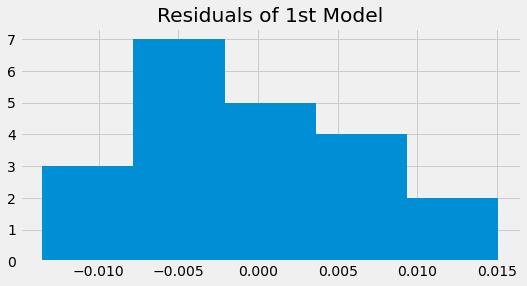

In [45]:
plt.style.use('fivethirtyeight')
plt.figure(figsize= (8, 4))
plt.hist(model2.resid, bins= 5)
plt.title('Residuals of 1st Model')


We see that based on the charts, residuals of the models are not completely normal. but the average of the residuals is around 0,